In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

import plotly.express as px
#increase font size of all elements
sns.set(font_scale=1.1)


PM: particluate matter

ppm (particle count ratio)
ug/m³ (mass/volume ratio)
um / 0.1L (mass/volume ratio)

- Conc_Stand_x : std(?) concentration of PM with size < (0.1 2.5, 10)um, in ppm (particle count ratio)?
- Conc_Env_x : env(?) concentration of PM with size < (0.1 2.5, 10) in ug/m³ (mass/volume ratio)?
- Part_x: count of  particles with size >  (0.3, 0.5, 1, 2.5, 50)um in 0.1L of air (count/volume ratio)

In [2]:
# read csv file
full_data = (pd.read_csv('donnee_Station_Meteo.csv', sep=';',
                       index_col=1,
                       parse_dates=[1])
            .dropna(how='all')
            .drop(columns=['id',' '])
            )
full_data.rename({
    'Conc_Stand_1': 'Conc_Stand_0.1',
    'Conc_Stand_25': 'Conc_Stand_2.5',
    'Conc_Env_1': 'Conc_Env_0.1',
    'Conc_Env_25': 'Conc_Env_2.5',
    'Part_03': 'Part_0.3',
    'Part_05': 'Part_0.5',
    'Part_25': 'Part_2.5',
     },axis=1, inplace=True)
display(full_data.info())
display(full_data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3036 entries, 2018-06-22 12:00:52 to 2022-01-31 07:08:40
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temp1           3036 non-null   float64
 1   hum1            3036 non-null   float64
 2   Pression        3036 non-null   float64
 3   Temp2           3036 non-null   float64
 4   hum2            3036 non-null   float64
 5   Conc_Stand_0.1  3036 non-null   int64  
 6   Conc_Stand_2.5  3036 non-null   int64  
 7   Conc_Stand_10   3036 non-null   int64  
 8   Conc_Env_0.1    3036 non-null   int64  
 9   Conc_Env_2.5    3036 non-null   int64  
 10  Conc_Env_10     3036 non-null   int64  
 11  Part_0.3        3036 non-null   int64  
 12  Part_0.5        3036 non-null   int64  
 13  Part_1          3036 non-null   int64  
 14  Part_2.5        3036 non-null   int64  
 15  Part_5          3036 non-null   int64  
 16  Part_50         3036 non-null   int64  
 1

None

,Temp1,hum1,Pression,Temp2,hum2,Conc_Stand_0.1,Conc_Stand_2.5,Conc_Stand_10,Conc_Env_0.1,Conc_Env_2.5,Conc_Env_10,Part_0.3,Part_0.5,Part_1,Part_2.5,Part_5,Part_50,Lum
time,,,,,,,,,,,,,,,,,,
2018-06-22 12:00:52,28.70,41.45,1011.88,29.07,50.52,6,10,22,6,10,22,0,0,0,0,0,0,51
2018-06-22 12:05:59,26.67,44.21,1011.90,26.63,53.92,6,9,9,6,9,9,1164,366,50,3,0,0,54
2018-06-22 12:11:05,25.63,46.44,1011.81,26.34,54.95,6,8,10,6,8,10,1164,340,37,5,2,0,22
2018-06-22 12:16:12,24.88,50.00,1011.77,26.07,57.26,7,8,9,7,8,9,1245,367,45,3,1,0,9
2018-06-22 12:21:19,24.95,49.12,1011.67,26.01,56.83,4,6,6,4,6,6,1182,332,28,2,0,0,11


In [3]:
data = full_data.drop(columns=['Temp2', 'hum2'])

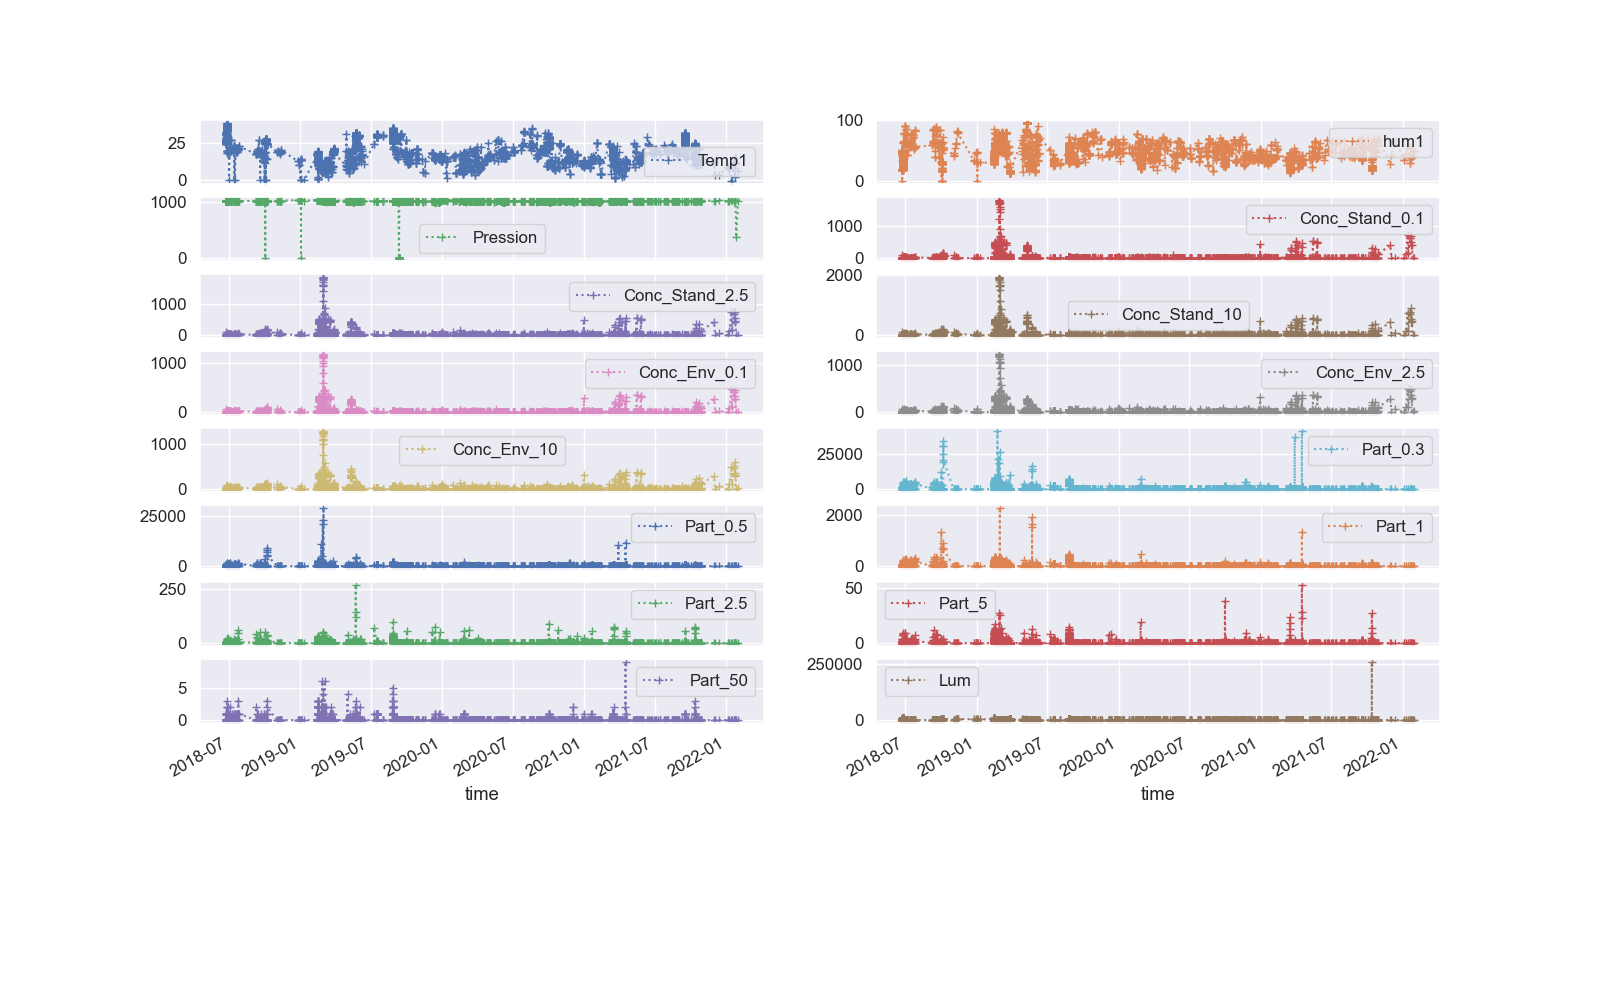

In [10]:
%matplotlib widget
data.plot(kind='line', style='+:', subplots=True, layout=(9,2), figsize=(16,10));
# plt.tight_layout()

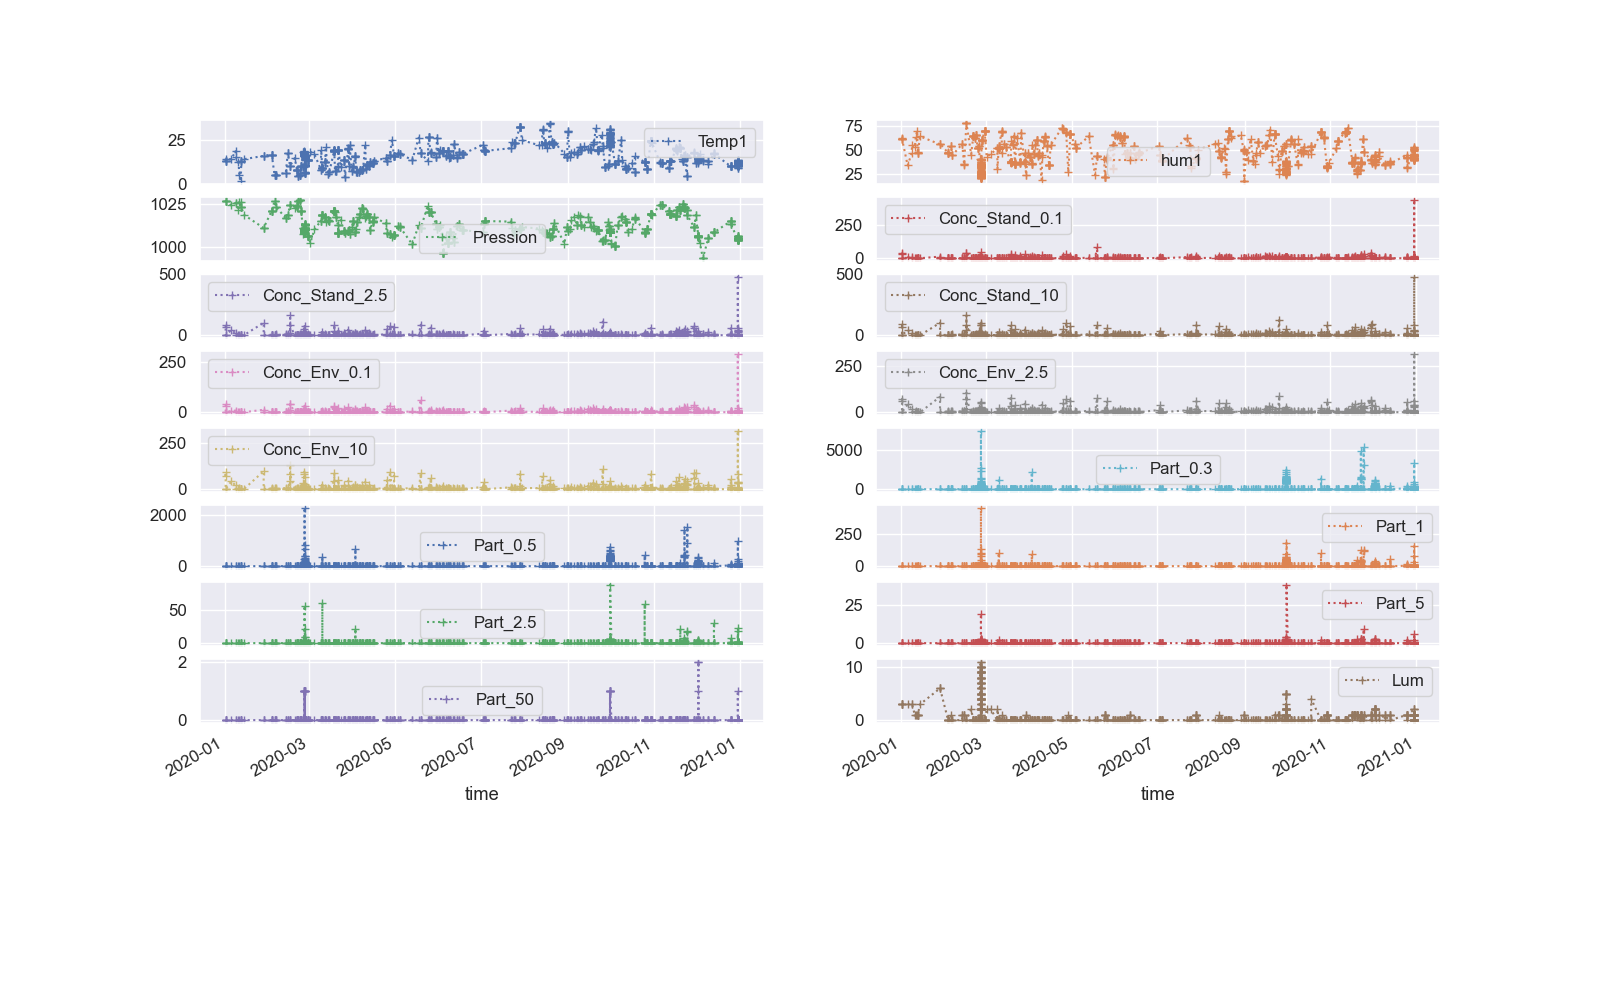

In [ ]:
%matplotlib widget
data.filter(regex=r'2020', axis=0).plot(kind='line', style='+:', subplots=True, layout=(9,2), figsize=(16,10));
# plt.tight_layout()

In [13]:
data['Conc_Env_0.1_2.5'] = (data['Conc_Env_2.5']-data['Conc_Env_0.1'])
data['Conc_Env_2.5_10'] = (data['Conc_Env_10']-data['Conc_Env_2.5'])
data['Conc_Stand_2.5_10'] = (data['Conc_Stand_10']-data['Conc_Stand_2.5'])
data['Conc_Stand_2.5_10'] = (data['Conc_Stand_10']-data['Conc_Stand_2.5'])

In [5]:
(data['Conc_Stand_10']==data['Conc_Env_10']).mean()

0.9150197628458498

<AxesSubplot:xlabel='Conc_Stand_2.5_10', ylabel='Conc_Env_2.5_10'>

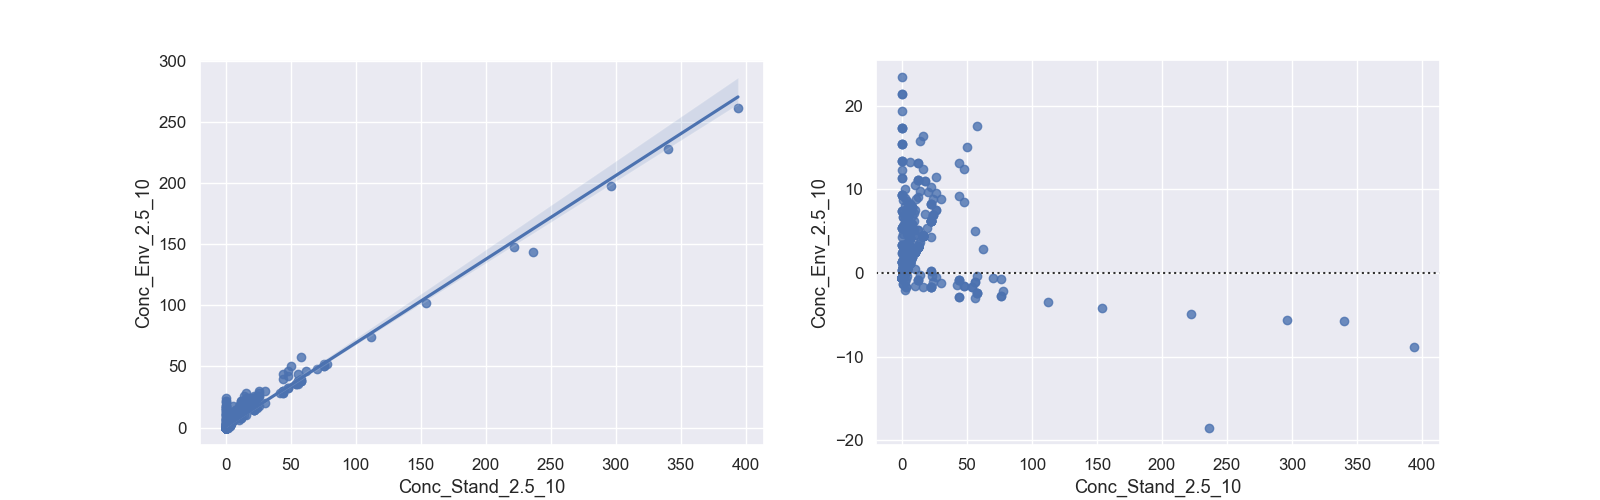

In [19]:
%matplotlib widget
sz="2.5_10"
fig, axs = plt.subplots(1,2,figsize=(16,5))
sns.regplot(data=data, x=f'Conc_Stand_{sz}',y=f'Conc_Env_{sz}', ax=axs[0])
sns.residplot(data=data, x=f'Conc_Stand_{sz}',y=f'Conc_Env_{sz}', ax=axs[1])

In [49]:
(data['Conc_Stand_0.1']==data['Conc_Env_0.1']).mean()

0.8932806324110671

In [50]:
(data['Conc_Stand_2.5']==data['Conc_Env_2.5']).mean()

0.8857048748353096

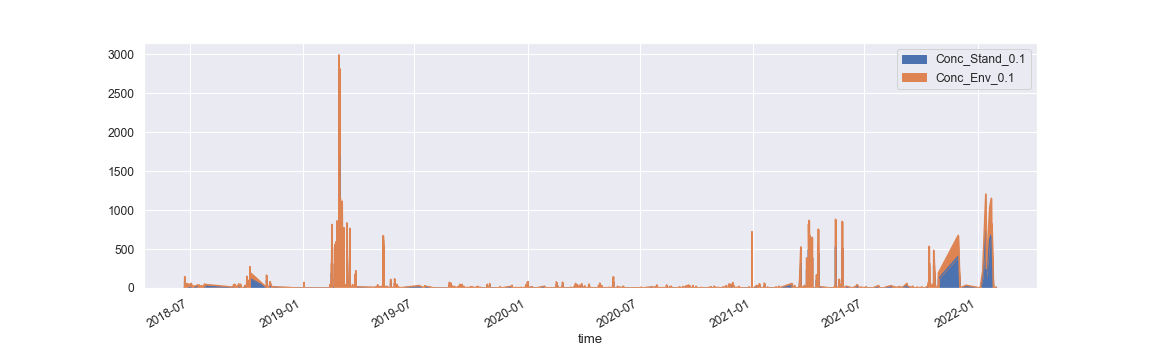

In [51]:
data.filter(regex=r"Conc_\w*_0\.1$").plot.area(figsize=(16,5));

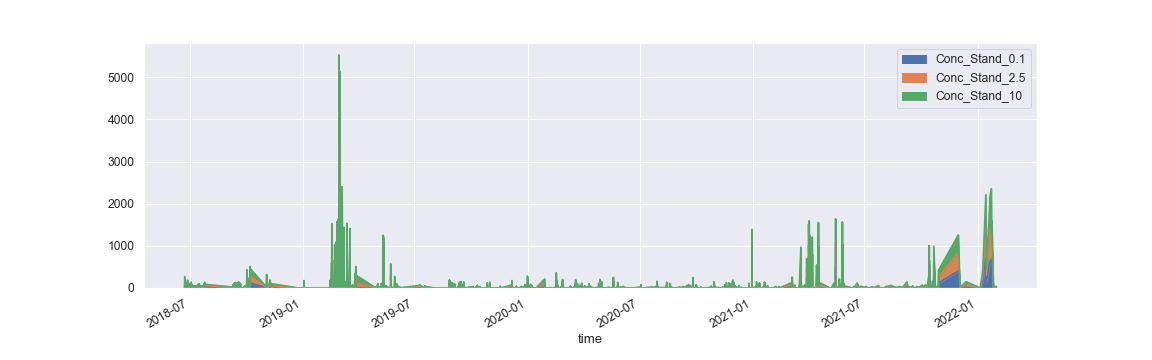

In [52]:
data.filter(regex="Conc_Stand*").plot.area(figsize=(16,5));

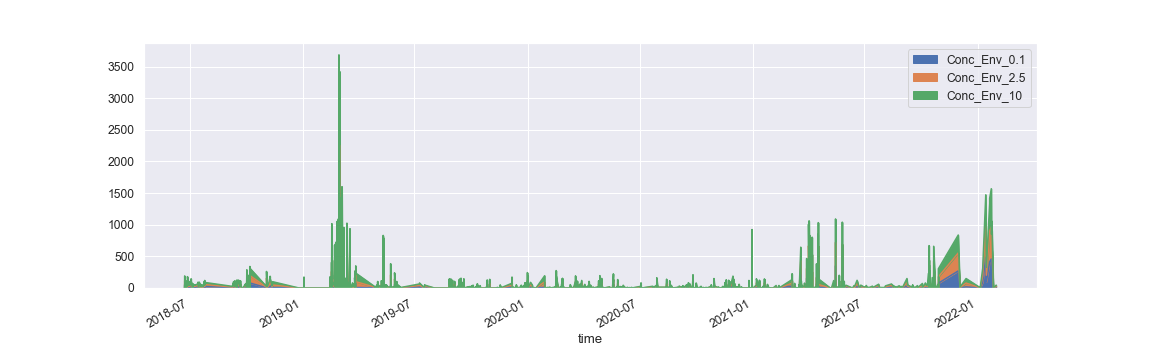

In [53]:
data.filter(regex="Conc_Env*").plot.area(figsize=(16,5));

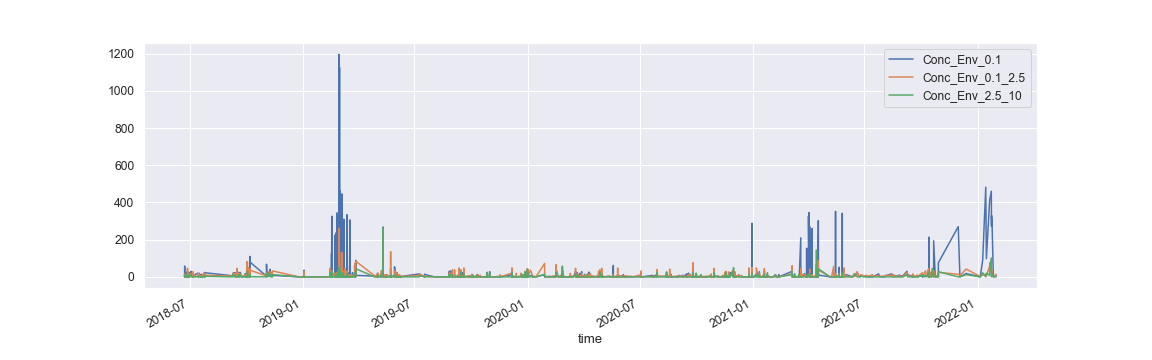

In [56]:
data.drop(columns=['Conc_Env_2.5','Conc_Env_10']).filter(regex="Conc_Env*").plot.line(figsize=(16,5));

<AxesSubplot:>

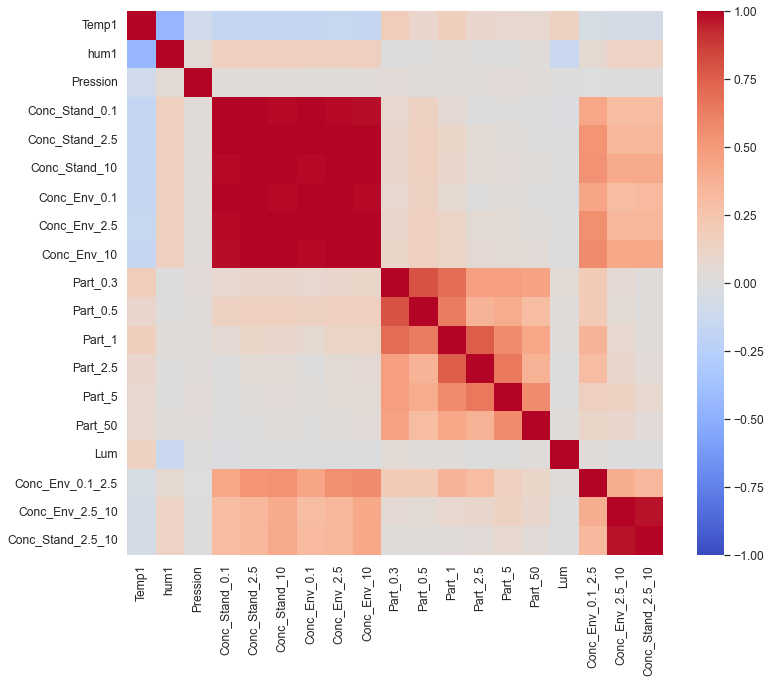

In [20]:
%matplotlib inline
plt.figure(figsize=(12,10))
corr = data.corr(method='kendall')
sns.heatmap(corr, cmap='coolwarm', center=0, vmax=1., vmin=-1.)

## Station meteo EPF

[Station meteo EPF](http://station-qualite.000webhostapp.com/visualisation.html)

In [ ]:
# wget.download('http://station-qualite.000webhostapp.com/export.php?', 'donnee_Station_Meteo.csv')

'donnee_Station_Meteo (3).csv'

In [ ]:
data = pd.read_csv('donnee_Station_Meteo.csv', sep=';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036 entries, 0 to 3035
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3036 non-null   int64  
 1   time           3036 non-null   object 
 2   Temp1          3036 non-null   float64
 3   hum1           3036 non-null   float64
 4   Pression       3036 non-null   float64
 5   Temp2          3036 non-null   float64
 6   hum2           3036 non-null   float64
 7   Conc_Stand_1   3036 non-null   int64  
 8   Conc_Stand_25  3036 non-null   int64  
 9   Conc_Stand_10  3036 non-null   int64  
 10  Conc_Env_1     3036 non-null   int64  
 11  Conc_Env_25    3036 non-null   int64  
 12  Conc_Env_10    3036 non-null   int64  
 13  Part_03        3036 non-null   int64  
 14  Part_05        3036 non-null   int64  
 15  Part_1         3036 non-null   int64  
 16  Part_25        3036 non-null   int64  
 17  Part_5         3036 non-null   int64  
 18  Part_50 

In [ ]:
data['time'] = pd.to_datetime(data.time)

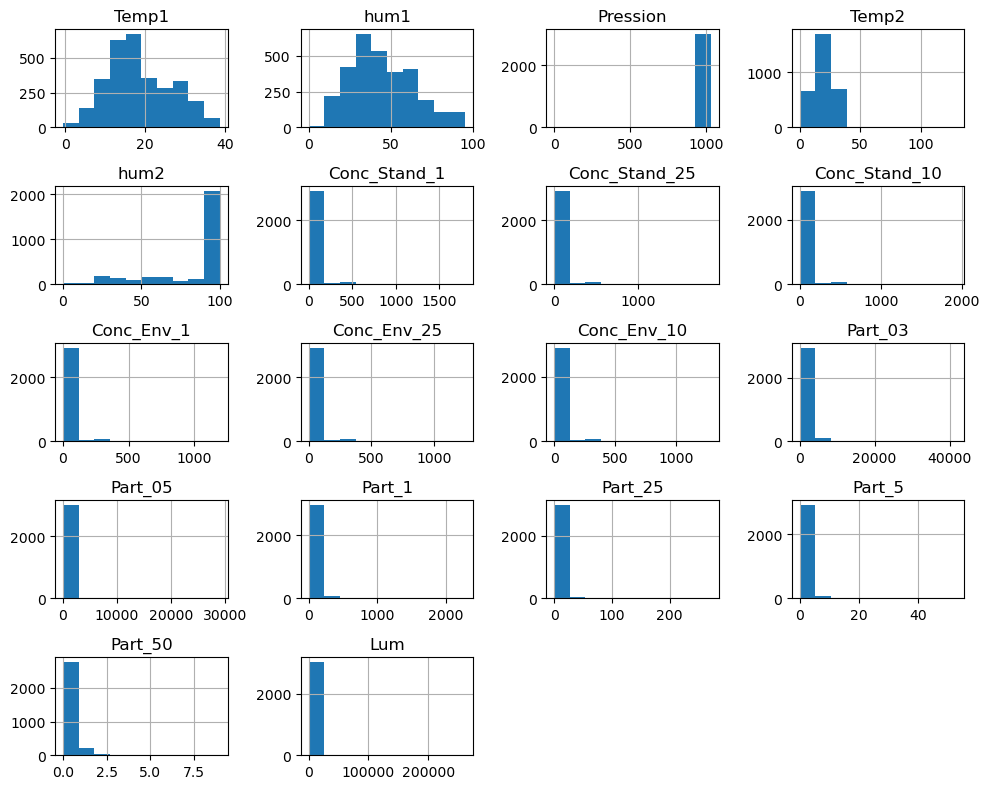

In [ ]:
data.drop(columns=['id', 'time']).hist(figsize=(10,8));
plt.tight_layout()

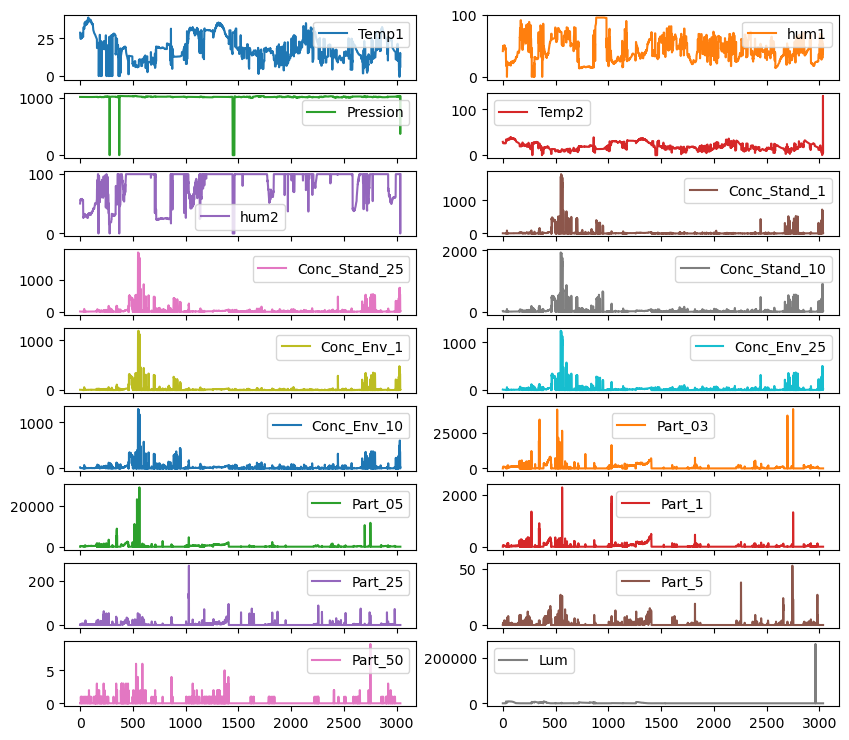

In [ ]:
data.drop(columns=['id', 'time']).plot(subplots=True, figsize=(10,10), layout=(10, 2));

<AxesSubplot:>

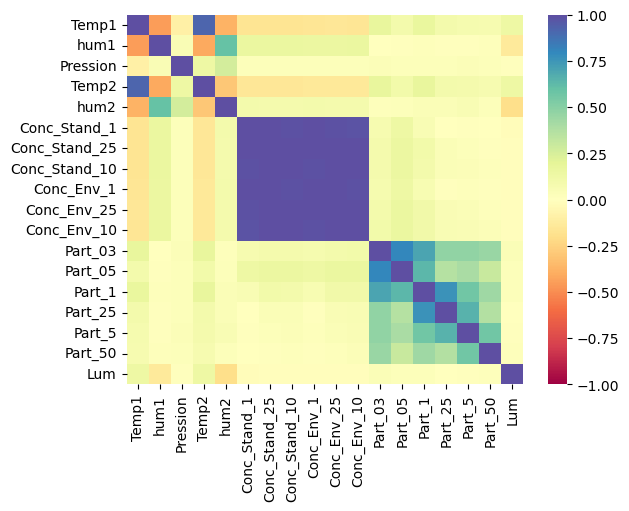

In [ ]:
# Correlation matrix
corr = data.drop(columns=['id']).corr()
sns.heatmap(corr, cmap='Spectral', center=0, vmax=1., vmin=-1.)

In [ ]:
# Creating a copy of the dataframe to work on
clean_data = data.copy(deep=True)

## Case study 1: Pression

In [ ]:
corr.Pression

Temp1           -0.094388
hum1             0.051350
Pression         1.000000
Temp2            0.133911
hum2             0.263297
Conc_Stand_1     0.028742
Conc_Stand_25    0.026628
Conc_Stand_10    0.026882
Conc_Env_1       0.029702
Conc_Env_25      0.026857
Conc_Env_10      0.027206
Part_03          0.032111
Part_05          0.024982
Part_1           0.027662
Part_25          0.024681
Part_5           0.031386
Part_50          0.026522
Lum              0.007877
Name: Pression, dtype: float64

In [ ]:
px.line(data, x='time', y='Pression')

In [ ]:
px.box(data, x='Pression')

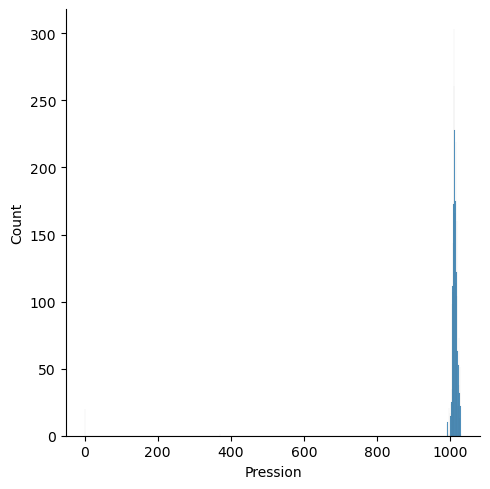

In [ ]:
sns.displot(data, x='Pression')

In [ ]:
data.Pression.describe()

count    3036.000000
mean     1006.951647
std        83.064496
min         0.000000
25%      1010.217500
50%      1013.135000
75%      1017.592500
max      1030.880000
Name: Pression, dtype: float64

In [ ]:
Q1, Q3 = data.Pression.describe()[['25%', '75%']]
IQR= Q3-Q1
k=1.5

pression = pd.DataFrame({
    'original': data.Pression,
    'time': data.time,
    f'winsorized k={k}': data.Pression.clip(lower=Q1-k*IQR, upper=Q3+k*IQR),
    f'NA k={k}': data.Pression.mask(data.Pression < (Q1-k*IQR)).mask(data.Pression >Q3+k*IQR),
    })

pression['NA+backfill'] = pression[f'NA k={k}'].fillna(method='bfill')
pression['NA+interpolate'] = pression[f'NA k={k}'].interpolate(method='linear')

px.box(pression, x=pression.columns.drop('time'))


In [ ]:
pression.describe()

,original,winsorized k=1.5,NA k=1.5,NA+backfill,NA+interpolate
count,3036.000000,3036.000000,2947.000000,3036.000000,3036.000000
mean,1006.951647,1013.794672,1014.006559,1013.994529,1013.969929
std,83.064496,6.025428,5.552671,5.805341,5.664900
min,0.000000,999.155000,1000.500000,1000.500000,1000.500000
25%,1010.217500,1010.217500,1010.460000,1010.387500,1010.390000
50%,1013.135000,1013.135000,1013.200000,1013.200000,1013.180000
75%,1017.592500,1017.592500,1017.590000,1017.822500,1017.682500
max,1030.880000,1028.655000,1028.080000,1028.080000,1028.080000


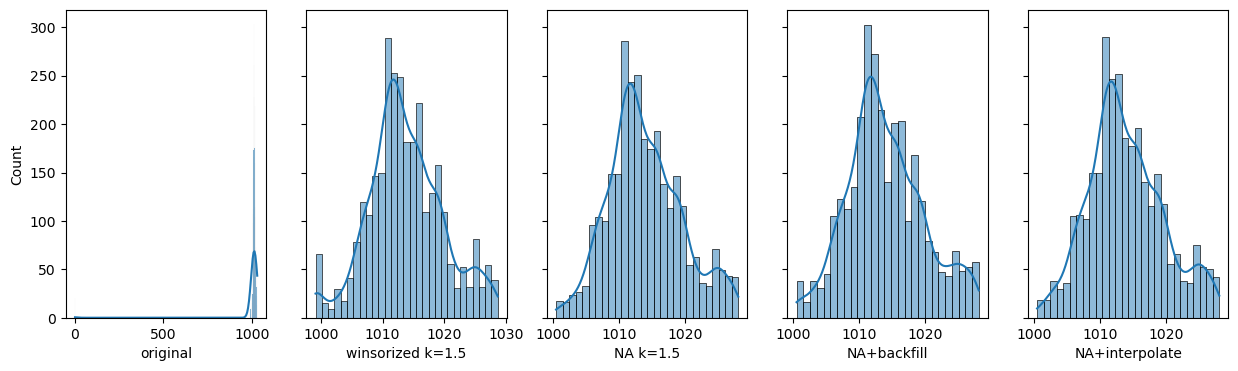

In [ ]:
fig, axs = plt.subplots(1, pression.shape[1]-1, figsize=(15,4), sharey=True)
for i, col in enumerate(pression.drop('time',axis=1)):
        sns.histplot(pression, x=col, ax=axs[i], kde=True)


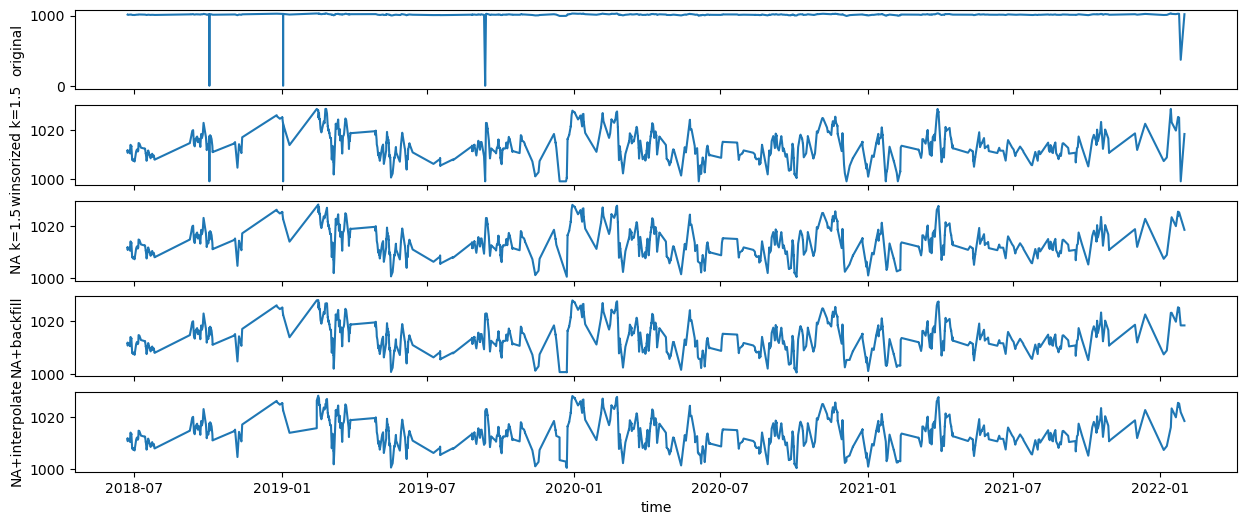

In [ ]:
fig, axs = plt.subplots(pression.shape[1]-1, 1, figsize=(15,6), sharex=True)
for i, col in enumerate(pression.drop('time',axis=1)):
        sns.lineplot(data=pression, x='time', y=col, ax=axs[i])


<AxesSubplot:>

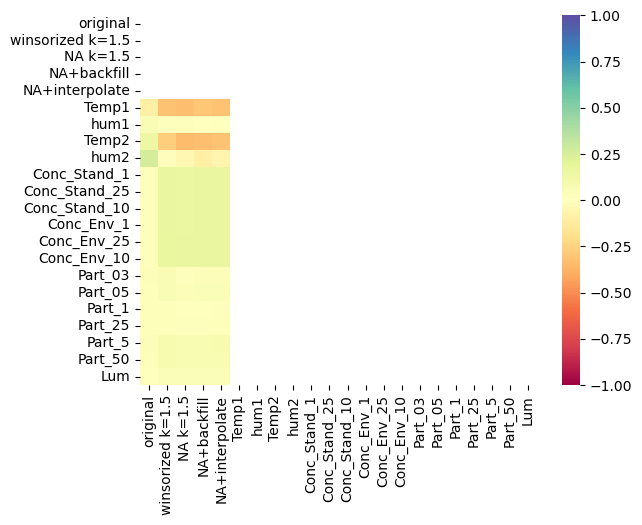

In [ ]:
df_corr = pd.concat([pression, data.drop(columns=['id','time', 'Pression'])], axis=1)
corr_ps = df_corr.corr()
mask = np.ones_like(corr_ps)
mask[pression.shape[1]-1:,:pression.shape[1]-1 ] = 0
sns.heatmap(corr_ps, mask=mask, cmap='Spectral', center=0, vmax=1., vmin=-1.)


<AxesSubplot:>

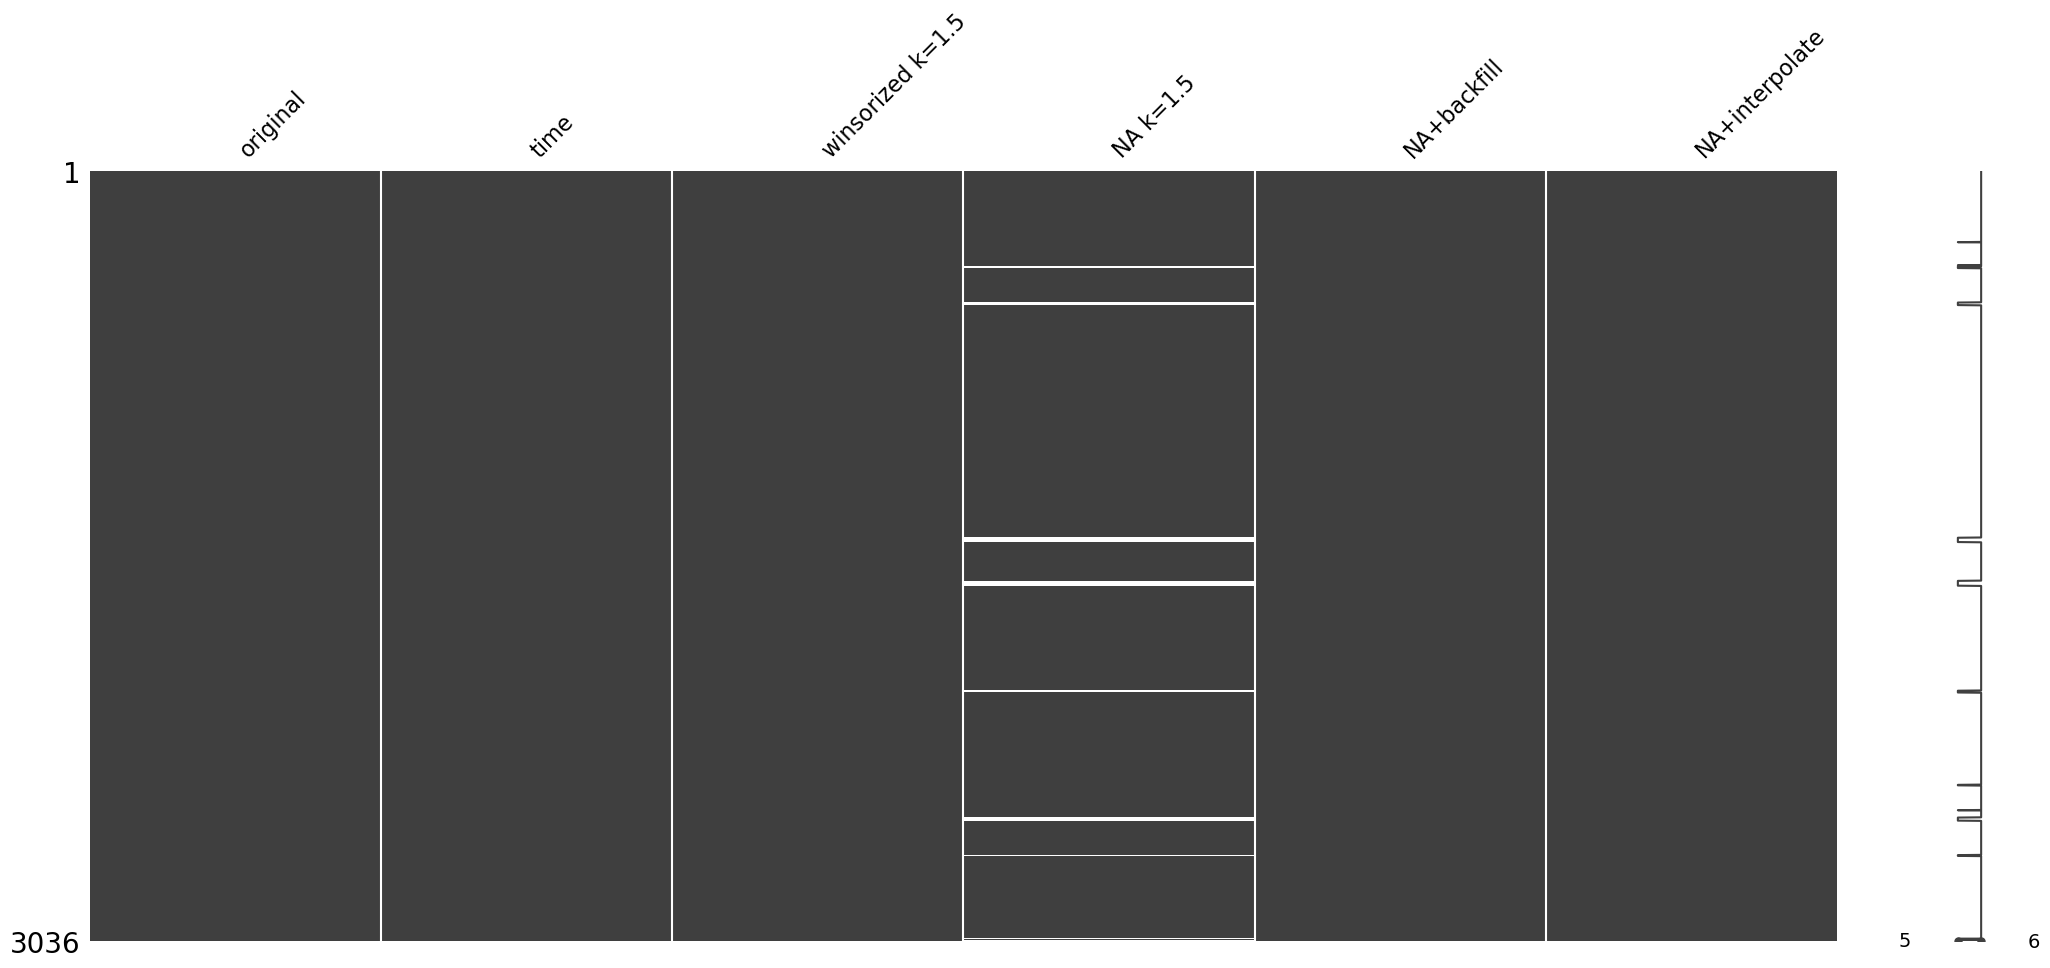

In [ ]:
msno.matrix(pression)